In [12]:
import cv2
import numpy as np
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
from utils import getXMPData, myImageSlicer
import glob
import os
import shutil 
from scipy import ndimage
def save_new_band(path,reference_band,matrix):
    new_band = rasterio.open(path,'w',driver='Gtiff',
                          width=reference_band.width, 
                          height = reference_band.height, 
                          count=1, crs=reference_band.crs, 
                          transform=reference_band.transform, 
                          dtype='float64')
    new_band.write(matrix,1)
    new_band.close()

def printGrountTruth(filepath,image):
    with open(filepath, "r") as my_file:
        annotations_list = my_file.read().split('\n')
        print(annotations_list)
def normalize(x, lower, upper):
    """ This is a simple linear normalization for an array to a given bound interval

        Params:
        x: image that needs to be normalized in this case
        lower: (int) the lower limit of the interval
        upper: (int) the upper limit of the interval

        Return:
        x_norm: the normalized image between the specified interval 
    """
    x_max = np.max(x)
    x_min = np.min(x)
    # The slope of the linear normalization
    m = (upper - lower) / (x_max - x_min)
    # Linear function for the normalization
    x_norm = (m * (x - x_min)) + lower

    return x_norm
def get_band_combination(ms_imaga_np,combination_name='NDVI'):
    # Bands order at the raster file should be as ['Red','Green','Blue','RE','NIR']
    red = ms_imaga_np[:,:,0]
    green = ms_imaga_np[:,:,1]
    blue = ms_imaga_np[:,:,2]
    re = ms_imaga_np[:,:,3]
    nir =ms_imaga_np[:,:,4]
    band_combinations ={
        'NDVI': (np.where((nir+red)==0., 0, np.divide((nir-red),(nir+red)))),
        'GNDVI': (np.where((nir+green)==0., 0, (nir-green)/(nir+green))),
        'NDRE': (np.where((nir+re+red)==0., 0, (nir-re)/(nir+red))),
        'LCI': (np.where((nir+re)==0., 0, (nir-re)/(nir+re))),
        'OSAVI': (np.where((nir+red)==0., 0, 1.6*((nir-red)/(nir-red+0.16))))
    }
    return band_combinations[combination_name]
def drawMatrix(image,numOfRows, numOfColumns, widthCells, heightCells):
  i = 1
  while i<=numOfRows:
    j=1
    while j<=numOfColumns:
      cv2.rectangle(image, ((j*widthCells)-widthCells, (i*heightCells)-heightCells), ((j*widthCells), (i*heightCells)), (0, 0, 255), 2)
      j = j+1
    i = i+1
  return image

(1300, 1600)


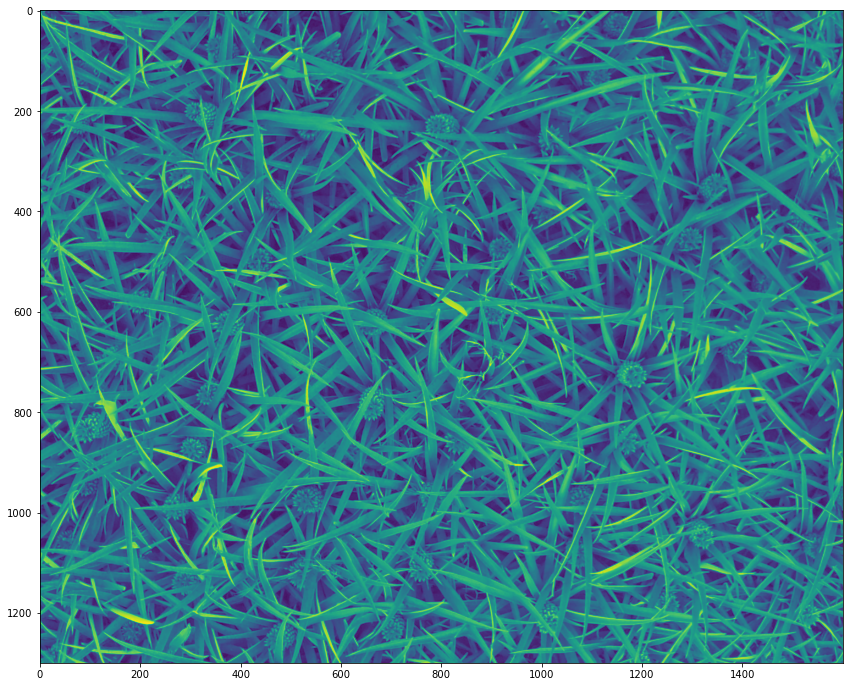

In [20]:
image_path = '/mnt/e/datosmanfred/gira_10_13_mar21_5m_sift_3_DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING_resized/00000048.JPG'
image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
#image = ndimage.sobel(image)
print(image.shape)
fig = plt.figure(figsize=(18,12))
plt.imshow(image)
plt.show()

NameError: name '__file__' is not defined

(1300, 1600, 5)


"\nimage_path = '/mnt/e/datosmanfred/Gira 10 13 Mar21/Lote 71/5_meters/00000048.JPG'\ndirpath,_ = os.path.split(image_path)\nimage_path_no_ext,file_extension = os.path.splitext(image_path)\nimage_name = os.path.basename(image_path_no_ext)\n\ncolors = ['Red','Green','Blue','RE','NIR']\nbands = []\nfor band_color in colors:\n    bands.append(rasterio.open(os.path.join(dirpath, f'{image_name}_{band_color}.TIF')).read(1).astype('float32'))\nms_image = np.dstack(bands)\nprint(ms_image.shape)\ncombination = get_band_combination(ms_image,'GNDVI')\nfig = plt.figure(figsize=(12,12))\nplot.show(combination)"

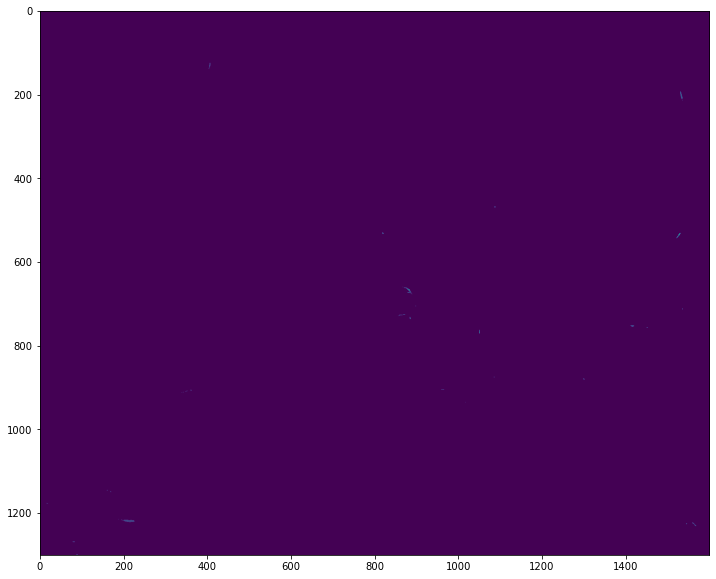

In [18]:
# Read reference image
image_path = '/mnt/e/datosmanfred/gira_10_13_mar21_5m_sift_3_DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING_resized/00000048.JPG'
dirpath,_ = os.path.split(image_path)
image_path_no_ext,file_extension = os.path.splitext(image_path)
image_name = os.path.basename(image_path_no_ext)

colors = ['Red','Green','Blue','RedEdge','NIR']
bands = []
for band_color in colors:
    bands.append(cv2.imread(os.path.join(dirpath, f'{image_name}_{band_color}.TIF'),cv2.IMREAD_GRAYSCALE).astype('uint16'))
ms_image = np.dstack(bands)
print(ms_image.shape)
#combination = normalize(get_band_combination(ms_image,'GNDVI'), 0, 65535)
combination = get_band_combination(ms_image,'GNDVI')
fig = plt.figure(figsize=(12,12))
plot.show(combination)

'''
image_path = '/mnt/e/datosmanfred/Gira 10 13 Mar21/Lote 71/5_meters/00000048.JPG'
dirpath,_ = os.path.split(image_path)
image_path_no_ext,file_extension = os.path.splitext(image_path)
image_name = os.path.basename(image_path_no_ext)

colors = ['Red','Green','Blue','RE','NIR']
bands = []
for band_color in colors:
    bands.append(rasterio.open(os.path.join(dirpath, f'{image_name}_{band_color}.TIF')).read(1).astype('float32'))
ms_image = np.dstack(bands)
print(ms_image.shape)
combination = get_band_combination(ms_image,'GNDVI')
fig = plt.figure(figsize=(12,12))
plot.show(combination)'''

In [13]:
print(type(image.read(1)))
print(image.read(1).shape)
print(image.count)
print(image.name)
print(image.bounds)
print(image.transform)
print(image.transform * (0, 0))
print(image.crs)
print(image.indexes)
print(image.read(1)[500:800])
red = image.read(1).astype('uint8')
green = image.read(2).astype('uint8')
blue = image.read(3).astype('uint8')
rgb = np.dstack((red,green,blue))
slicedMosaic = myImageSlicer(660,865,6600,8650,rgb)
print(type(slicedMosaic))

#fig = plt.figure(figsize=(18,12))
#plot.show(image)

<class 'numpy.ndarray'>
(8671, 7073)
4
datasets/mosaico/mosaico_10m.tif
BoundingBox(left=-84.94191964137994, bottom=10.79721245049804, right=-84.94160266842144, top=10.79759663909634)
| 0.00, 0.00,-84.94|
| 0.00,-0.00, 10.80|
| 0.00, 0.00, 1.00|
(-84.94191964137994, 10.79759663909634)
EPSG:4326
(1, 2, 3, 4)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
<class 'list'>


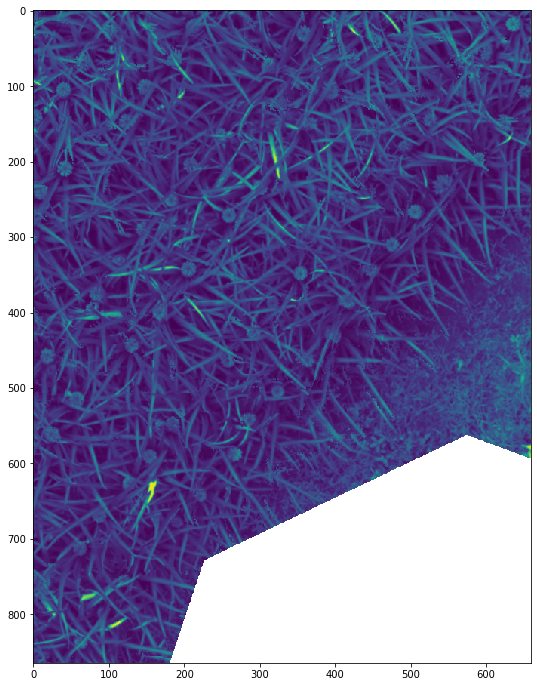

In [33]:
#cv2.imwrite('datasets/result/L301_B24_10m_6_6.jpg',slicedMosaic[6][6])
#fig = plt.figure(figsize=(12,12))
#plt.imshow(slicedMosaic[6][6])

red = rasterio.open('datasets/mosaico/L301 B24_10m/L301_B24_10m_Red.tif')
green = rasterio.open('datasets/mosaico/L301 B24_10m/L301_B24_10m_Green.tif')
blue = rasterio.open('datasets/mosaico/L301 B24_10m/L301_B24_10m_Blue.tif')
red = myImageSlicer(660,865,6600,8650,red.read(1))[6][6]
green = myImageSlicer(660,865,6600,8650,green.read(1))[6][6]
blue = myImageSlicer(660,865,6600,8650,blue.read(1))[6][6]
#rgb = np.dstack((red.read(1).astype('uint8'),green.read(1).astype('uint8'),blue.read(1).astype('uint8')))
rgb = np.dstack((red,green,blue))
fig = plt.figure(figsize=(12,12))
plot.show(green)

<class 'numpy.ndarray'>
uint8
(1300, 1600, 3)


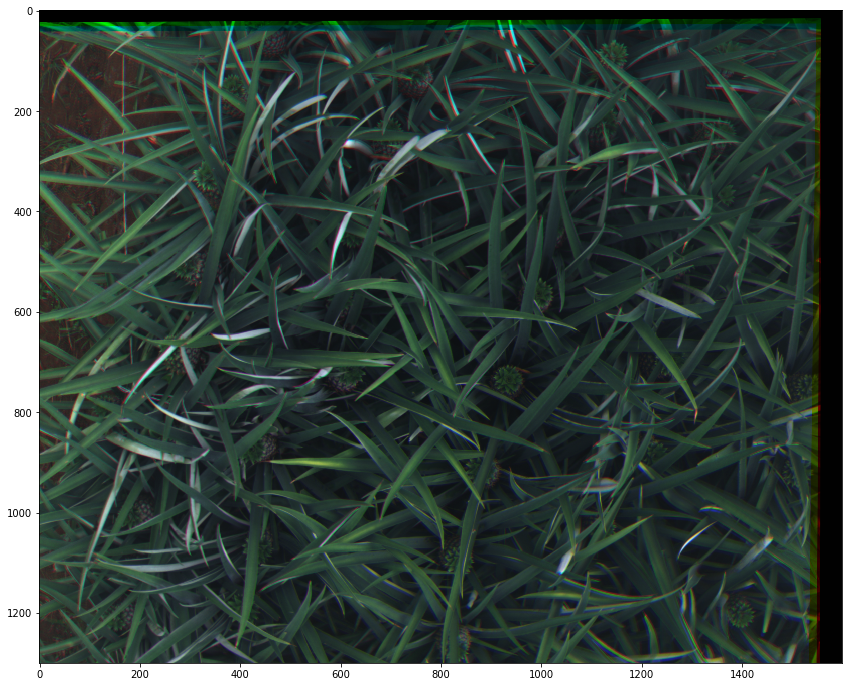

In [31]:
red = image.read(1).astype('uint8')
green = image.read(2).astype('uint8')
blue = image.read(3).astype('uint8')
rgb = np.dstack((red,green,blue))
print(type(rgb))
print(rgb.dtype)
print(rgb.shape)
#rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)
#cv2.imwrite('datasets/result/00000186_DFS.jpg',rgb)
fig = plt.figure(figsize=(18,12))
plt.imshow(rgb)

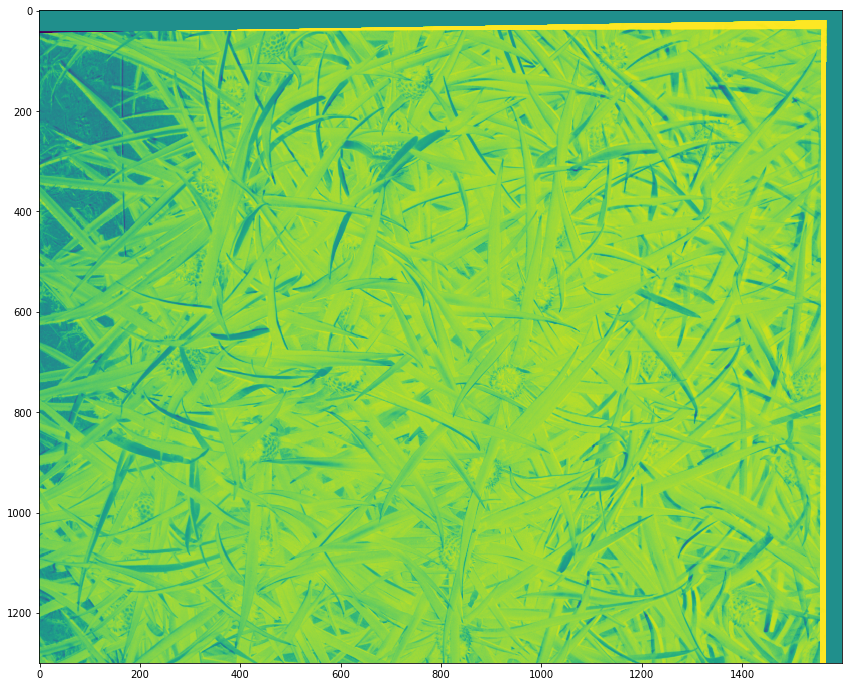

In [36]:
fig = plt.figure(figsize=(18,12))
plot.show(get_band_combination(image,'NDVI'))

In [35]:
def files_to_array_yolov3(file_input_dir, class_file,img_extension):
    """
    Read files of annotations (yolo v3) and classes and returns the info into lists.
    Params
    :annotations_directory(str) path to annotations (format: yolo v3).
    :class_file(str) path to annotations (format: yolo v3).
    Returns
    :annotaions_result(list of tuples) format: [('image_name.jpg', [anno_1, anno_2]), ... , (...)]
    :class_file(list of classes) string list of the names of the classes.
    """
    class_list = []
    with open(class_file, "r") as my_file:
        #class_list = my_file.read().split('\n')
        for line in my_file.read().split('\n'):
            if len(line.strip()) > 1:
                class_list.append(line)

    myImages = [f for f in os.listdir(file_input_dir) if f.endswith(f'.{img_extension}')]
    
    annotations_names = []
    annotations_bboxes = []
    for file_image_name in myImages:
        img_path = file_input_dir + file_image_name
        imgRGB = cv2.imread(img_path)
        imageHeight, imageWidth, channels = imgRGB.shape
        yoloFile = open(img_path[:len(img_path)-4]+'.txt','r').readlines()
        
        annotations = []
        for label in yoloFile:
            label = label.split()
            xcenter = float(label[1]) * imageWidth
            ycenter = float(label[2]) * imageHeight
            bbox_width = float(label[3]) * imageWidth
            bbox_height = float(label[4]) * imageHeight
            x_top_left = int(abs(xcenter-(bbox_width/2)))
            y_top_left  = int(abs(ycenter - (bbox_height/2)))
            x_bottom_right = x_top_left + bbox_width
            y_bottom_right = y_top_left + bbox_height
            annotations.append(f'{x_top_left},{y_top_left},{x_bottom_right},{y_bottom_right},{label[0]}')
        annotations_names.append(file_image_name)
        annotations_bboxes.append(annotations)
    return annotations_names, annotations_bboxes, class_list

In [2]:
#annotations_names, annotations_bboxes, class_list = files_to_array_yolov3('/home/manfred/workspace/multispectral-pineapple-detection/datasets/result/', '/home/manfred/workspace/multispectral-pineapple-detection/datasets/result/classes.txt','jpg')
#print(annotations_names)
#rgb = cv2.imread('datasets/result/00000165.JPG')
#['Red','Green','Blue','RE','NIR']
#image = normalize(get_band_combination(rasterio.open('datasets/result/00000184.TIF'),combination_name='LCI'), 0, 255)
#image = cv2.imread('datasets/result/L301_B24_10m_6_6.jpg')
#image = rasterio.open('datasets/result/00000184.TIF').read(5)
#image = rasterio.open('datasets/result/L301_B24_10m_6_6.jpg').read(1)
#red = image.read(1).astype('uint8')
#green = image.read(2).astype('uint8')
#blue = image.read(3).astype('uint8')
#image = np.dstack((red,green,blue))
'''
red = rasterio.open('datasets/mosaico/L301 B24_10m/L301_B24_10m_Red.tif')
blue = myImageSlicer(660,865,6600,8650,blue.read(1))[6][6]
#rgb = np.dstack((red.read(1).astype('uint8'),green.read(1).astype('uint8'),blue.read(1).astype('uint8')))
rgb = np.dstack((red,green,blue))
image = red
'''
image = rasterio.open('datasets/mosaico/L301 B24_10m/L301_B24_10m.tif')
red = image.read(1)
green = image.read(2)
blue = image.read(3)
image = np.dstack((red,green,blue))
image = drawMatrix(image,10, 10, 660, 865)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
'''image = myImageSlicer(660,865,6600,8650,image)[6][6]
print(image.dtype)
print(image.shape)
for line in annotations_bboxes[0]:
    line = line.split(',')
    image = cv2.rectangle(image, (int(float(line[0])), int(float(line[1]))), (int(float(line[2])), int(float(line[3]))), (255, 0, 0), 2)

#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#cv2.cvtColor(imReference, cv2.COLOR_RGB2GRAY)
fig = plt.figure(figsize=(18,12))
#plot.show(image)
plt.imshow(image)'''
cv2.imwrite('datasets/result/L301_B24_10m_Matrix.JPG',image)

True